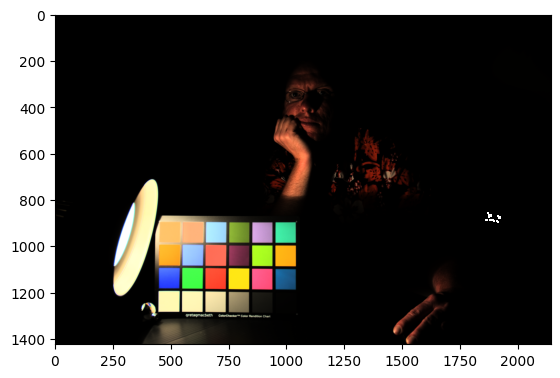

Output saved as reinhard.png


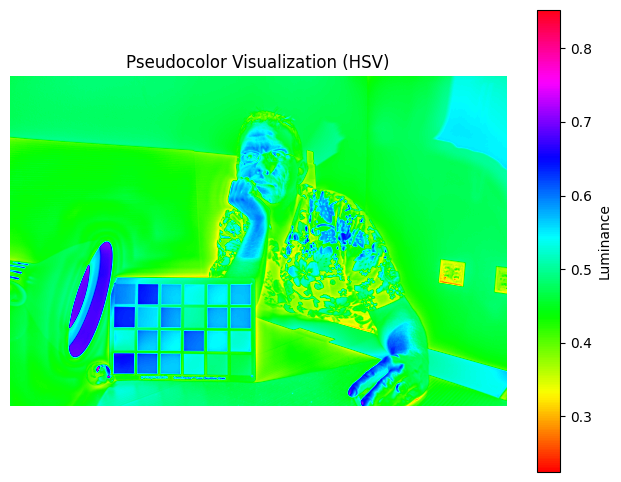

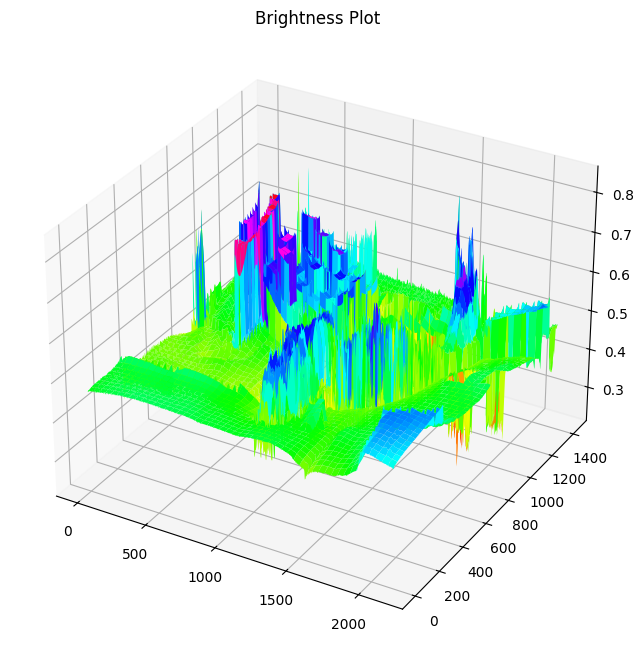

Pseudocolor PNG saved as output_pseudocolor.png
Output saved as output.exr
Output saved as output.png


In [2]:
from dino import *
from plotting import *
from tone_mappers.reinhard import reinhard_tone_map

file_path = "../images/HDRMark.exr"
image = read_image(file_path)

# Convert to XYZ and compute luminance and chromaticities
X, Y, Z = rgb_to_xyz(image)
luminance, x_chroma, y_chroma = xyz_to_lxy(X, Y, Z)
new_luminance = reinhard_tone_map(luminance)
reinhard_rgb = lxy_to_rgb(new_luminance, x_chroma, y_chroma)
save_png("_output/reinhard.png", reinhard_rgb)
plt.imshow(reinhard_rgb)
plt.show()
print("Output saved as reinhard.png")

# Define scales for Gaussian blurring
scales = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

# Compute weighted sum of ratios
scaled_luminance = dn_brightness_model(luminance, scales) / 10.0

# Ensure scaled_luminance is 2D
scaled_luminance = np.squeeze(scaled_luminance)
if scaled_luminance.ndim != 2:
    raise ValueError(
        f"Expected 2D array for scaled_luminance, got shape {scaled_luminance.shape}"
    )

# Display pseudocolor visualization on screen
display_pseudocolor(scaled_luminance, "Pseudocolor Visualization (HSV)")

# Display scaled luminance as height plot
display_height_plot(scaled_luminance)

# Save pseudocolor PNG
save_pseudocolor_png("_output/output_pseudocolor.png", scaled_luminance)
print("Pseudocolor PNG saved as output_pseudocolor.png")

# Convert back to RGB
rgb_output = lxy_to_rgb(scaled_luminance, x_chroma, y_chroma)

# Save to EXR
save_exr("_output/output.exr", rgb_output)
print("Output saved as output.exr")

# Save scaled luminance as PNG
save_png("_output/output.png", scaled_luminance)
print("Output saved as output.png")